## Hypothesis

#### 1. Average abv of the beers in the world is 5%. This sample dataset represents population
#### 2. The overall characteristics and your personal experience of the beer is strongly influenced by aroma and taste
#### 3. Stronger beers (above 10% abv) are rated 5 for overall charecteristics
#### 4. More the review time, better is the rating i.e beers rated 4, 5 for overall charecteristics has taken more time for review 
#### 5. Atleast 80% of the beers have abv between 4% - 7%


# 

## Importing Libraries & Data

In [1]:
import pandas as pd 
import numpy as np #For Mathematic calulcation
import seaborn as sns #For data visualization
import matplotlib.pyplot as plt #For plotting graph
import os #For changing directory

import sklearn #Scikit-Learn for Model Building
from sklearn.metrics import r2_score, mean_squared_error
from scipy import stats
import statsmodels.api as sm

def summary_stats(col):
    """
    Computes summary statistics (min, max, quartiles) of a column in a database.
    Args: col (pandas.Series): The column of the database to analyze.
    Returns: dict: A dictionary containing the summary statistics.
    """
    
    # Compute summary statistics
    min_val = col.min()
    max_val = col.max()
    quartiles = np.percentile(col, [25, 50, 75, 90, 95, 99, 10])
    
    # Create dictionary of summary statistics
    stats_dict = {
        'Min': min_val,
        '10%ile': quartiles[6],
        'Q1': quartiles[0],
        'Q2 (Median)': quartiles[1],
        'Q3': quartiles[2],
        '90%ile': quartiles[3],
        '95%ile': quartiles[4],
        '99%ile': quartiles[5],
        'Max': max_val
    }
    
    return stats_dict

In [2]:
path1="......../Python_Beer_Review" #Insert folder where csv file is stored
os.chdir(path1) #Directory path1 is set

In [3]:
db = pd.read_csv("beer_reviews.csv")

## Understanding the data

In [4]:
db.columns

Index(['brewery_id', 'brewery_name', 'review_time', 'review_overall',
       'review_aroma', 'review_appearance', 'review_profilename', 'beer_style',
       'review_palate', 'review_taste', 'beer_name', 'beer_abv',
       'beer_beerid'],
      dtype='object')

In [5]:
db.shape

(1586614, 13)

In [6]:
db.dtypes

brewery_id              int64
brewery_name           object
review_time             int64
review_overall        float64
review_aroma          float64
review_appearance     float64
review_profilename     object
beer_style             object
review_palate         float64
review_taste          float64
beer_name              object
beer_abv              float64
beer_beerid             int64
dtype: object

In [7]:
print(db.head(5))

   brewery_id             brewery_name  review_time  review_overall  \
0       10325          Vecchio Birraio   1234817823             1.5   
1       10325          Vecchio Birraio   1235915097             3.0   
2       10325          Vecchio Birraio   1235916604             3.0   
3       10325          Vecchio Birraio   1234725145             3.0   
4        1075  Caldera Brewing Company   1293735206             4.0   

   review_aroma  review_appearance review_profilename  \
0           2.0                2.5            stcules   
1           2.5                3.0            stcules   
2           2.5                3.0            stcules   
3           3.0                3.5            stcules   
4           4.5                4.0     johnmichaelsen   

                       beer_style  review_palate  review_taste  \
0                      Hefeweizen            1.5           1.5   
1              English Strong Ale            3.0           3.0   
2          Foreign / Export Stou

### Beers are rated for aroma, appearance, taste, palate and overall experiences
### These rating must be 1 - 5

In [8]:
print("Unique (Brewery) = ", db["brewery_name"].nunique())
print("Unique (Beer) = ", db["beer_name"].nunique())
print("Unique (Beer_Style) = ", db["beer_style"].nunique())
print("Unique (Beer_Abv) = ", db["beer_abv"].nunique())
print("Unique (review_profilename) = ", db["review_profilename"].nunique())

print("Unique (review_overall) = ", db["review_overall"].nunique())
print("Unique (review_aroma) = ", db["review_aroma"].nunique())
print("Unique (review_appearance) = ", db["review_appearance"].nunique())
print("Unique (review_palate) = ", db["review_palate"].nunique())
print("Unique (review_taste) = ", db["review_taste"].nunique())

Unique (Brewery) =  5742
Unique (Beer) =  56857
Unique (Beer_Style) =  104
Unique (Beer_Abv) =  530
Unique (review_profilename) =  33387
Unique (review_overall) =  10
Unique (review_aroma) =  9
Unique (review_appearance) =  10
Unique (review_palate) =  9
Unique (review_taste) =  9


### review_overall & review_appearance seems to have a outlier


# EDA
# Missing Values & Outliers treatment

In [9]:
#Finding percent missing values in each column
missing_counts = db.isna().sum() #Count of missing values
missing_percentages = (missing_counts / len(db)) * 100 #Percentage of missing values

missing_data = pd.concat([missing_counts, missing_percentages], axis=1) #Combining both
missing_data.columns = ['missing_count', 'missing_percentage'] #Labeling

print(missing_data)

                    missing_count  missing_percentage
brewery_id                      0            0.000000
brewery_name                   15            0.000945
review_time                     0            0.000000
review_overall                  0            0.000000
review_aroma                    0            0.000000
review_appearance               0            0.000000
review_profilename            348            0.021934
beer_style                      0            0.000000
review_palate                   0            0.000000
review_taste                    0            0.000000
beer_name                       0            0.000000
beer_abv                    67785            4.272306
beer_beerid                     0            0.000000


In [10]:
#Since the missing values are not much, filling categorical & ordinal with MODE
# NOTE: We use [0] with mode() because mode() returns a series of value and we take the first one with [0]
db["brewery_name"].fillna(db["brewery_name"].mode()[0], inplace = True)
db["review_profilename"].fillna(db["review_profilename"].mode()[0], inplace = True)

#Filling numerical with MEDIAN
db["beer_abv"].fillna(db["beer_abv"].median(), inplace = True)

db.isnull().sum()

brewery_id            0
brewery_name          0
review_time           0
review_overall        0
review_aroma          0
review_appearance     0
review_profilename    0
beer_style            0
review_palate         0
review_taste          0
beer_name             0
beer_abv              0
beer_beerid           0
dtype: int64

4.0    582764
4.5    324385
3.5    301817
3.0    165644
5.0     91320
2.5     58523
2.0     38225
1.5     12975
1.0     10954
0.0         7
Name: review_overall, dtype: int64
4.0    582764
4.5    324385
3.5    301817
3.0    165644
5.0     91320
2.5     58523
2.0     38225
1.5     12975
1.0     10954
Name: review_overall, dtype: int64
4.0    0.367302
4.5    0.204452
3.5    0.190228
3.0    0.104401
5.0    0.057557
2.5    0.036886
2.0    0.024092
1.5    0.008178
1.0    0.006904
Name: review_overall, dtype: float64


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7128\3731678481.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(x) for x in ax.get_yticks()])


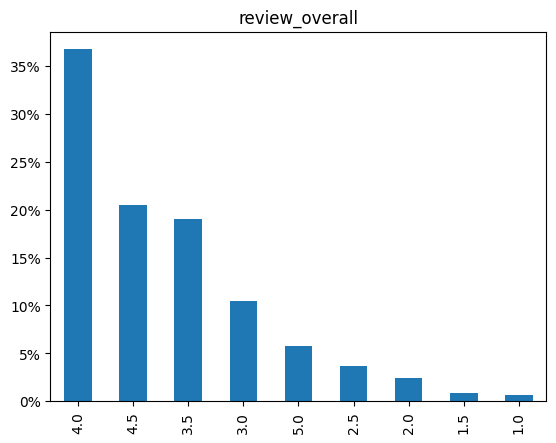

In [11]:
print(db["review_overall"].value_counts())

db = db[db['review_overall'] != 0]
print(db["review_overall"].value_counts())
print(db["review_overall"].value_counts(normalize=True))

ax = db["review_overall"].value_counts(normalize=True).plot.bar(title = "review_overall")
ax.set_yticklabels(['{:,.0%}'.format(x) for x in ax.get_yticks()])
plt.show()

4.0    0.424923
3.5    0.200761
4.5    0.181588
3.0    0.104631
5.0    0.041219
2.5    0.024891
2.0    0.016018
1.5    0.003874
1.0    0.002094
Name: review_appearance, dtype: float64


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7128\1516019864.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(x) for x in ax.get_yticks()])


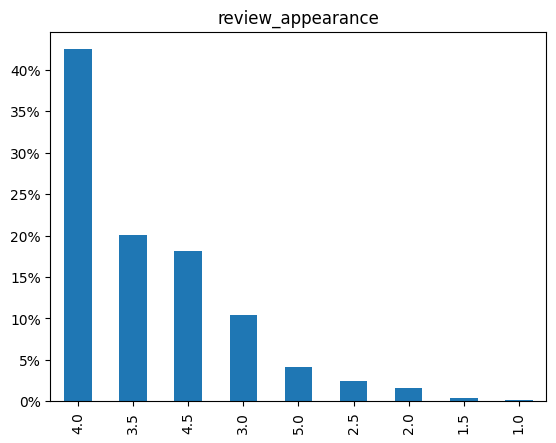

In [12]:
print(db["review_appearance"].value_counts(normalize=True))

ax = db["review_appearance"].value_counts(normalize=True).plot.bar(title = "review_appearance")
ax.set_yticklabels(['{:,.0%}'.format(x) for x in ax.get_yticks()])
plt.show()

4.0    0.351304
3.5    0.230247
4.5    0.171088
3.0    0.126073
2.5    0.041824
5.0    0.040411
2.0    0.026826
1.5    0.007894
1.0    0.004332
Name: review_aroma, dtype: float64


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7128\1171516439.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(x) for x in ax.get_yticks()])


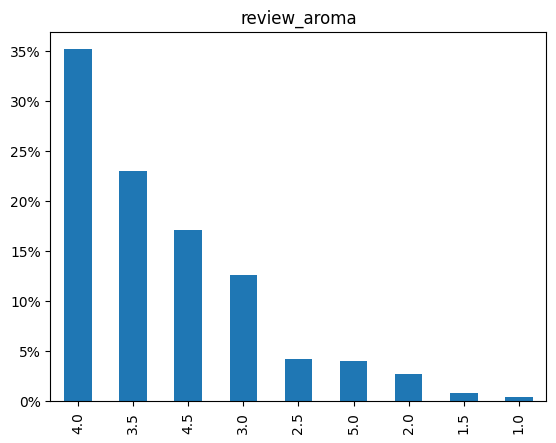

In [13]:
print(db["review_aroma"].value_counts(normalize=True))

ax = db["review_aroma"].value_counts(normalize=True).plot.bar(title = "review_aroma")
ax.set_yticklabels(['{:,.0%}'.format(x) for x in ax.get_yticks()])
plt.show()

4.0    0.382395
3.5    0.213402
4.5    0.159524
3.0    0.130423
2.5    0.039606
5.0    0.039197
2.0    0.024159
1.5    0.006961
1.0    0.004333
Name: review_palate, dtype: float64


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7128\2129575738.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(x) for x in ax.get_yticks()])


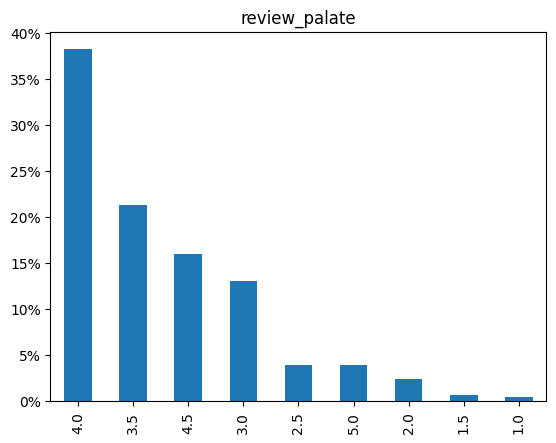

In [14]:
print(db["review_palate"].value_counts(normalize=True))

ax = db["review_palate"].value_counts(normalize=True).plot.bar(title = "review_palate")
ax.set_yticklabels(['{:,.0%}'.format(x) for x in ax.get_yticks()])
plt.show()

4.0    0.341250
4.5    0.211875
3.5    0.204550
3.0    0.105168
5.0    0.052929
2.5    0.041935
2.0    0.026463
1.5    0.009534
1.0    0.006297
Name: review_taste, dtype: float64


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7128\1009278683.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(x) for x in ax.get_yticks()])


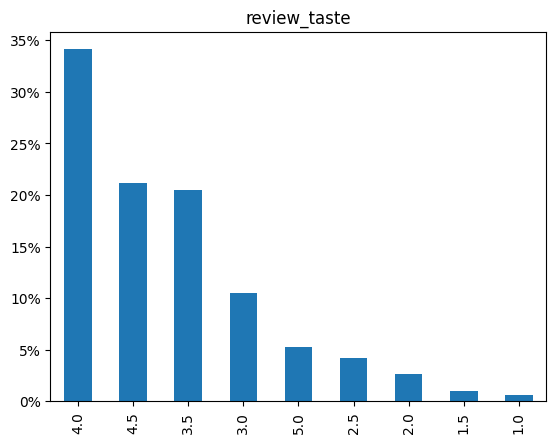

In [15]:
print(db["review_taste"].value_counts(normalize=True))

ax = db["review_taste"].value_counts(normalize=True).plot.bar(title = "review_taste")
ax.set_yticklabels(['{:,.0%}'.format(x) for x in ax.get_yticks()])
plt.show()

## Findings

#### taste: 85% of the rating is between 3 - 4.5
#### palate: 85% of the rating is between 3 - 4.5
#### aroma: 85% of the rating is between 3 - 4.5
#### appearance: 90% of the rating is between 3 - 4.5
#### overall: 85% of the rating is between 3 - 4.5

# Hypothesis Testing

### Hypothesis 01: Average abv of the beers in the world is 5%. This sample dataset represents population

In [16]:
summary_stats(db["beer_abv"])

{'Min': 0.01,
 '10%ile': 4.8,
 'Q1': 5.3,
 'Q2 (Median)': 6.5,
 'Q3': 8.4,
 '90%ile': 10.0,
 '95%ile': 11.0,
 '99%ile': 14.0,
 'Max': 57.7}

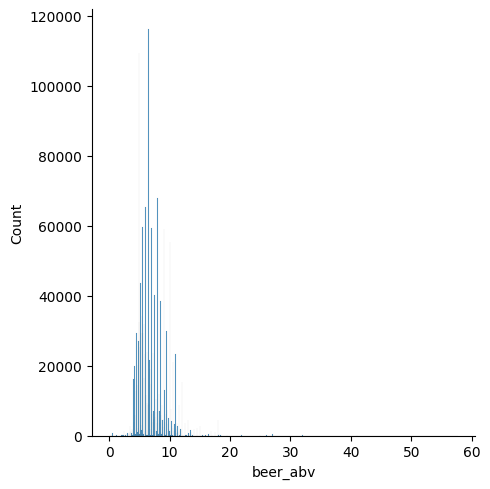

In [17]:
sns.displot(db["beer_abv"])

### Doing 2 tail test to check the hypothesis
#### Null Hypothesis: Avg of sample is 5%
#### Alternate Hypothesis: Avg os sample is not 5%
#### Significance level (alpha) = 5%

#### The abv seems to be normally distributed as seen from the histogram plot above, applying two tailed z-test
#### Also, since the sample size >>>>> 30, we can assume it is normally distributed

In [18]:
abv_mean = db["beer_abv"].mean()
abv_std = db["beer_abv"].std()
pop_mean = 5
sample_size = len(db)

z_score = (abv_mean - pop_mean) / (abv_std / np.sqrt(sample_size))
p_value = stats.norm.sf(abs(z_score))*2

if p_value < 0.025 and p_value > 0.0975:
    print("The sample mean is significantly different from the population mean.")
else:
    print("The sample mean is not significantly different from the population mean.")

The sample mean is not significantly different from the population mean.


#### The sample is not significantly different from the population mean. Thus, it represents the population.

### Hypothesis 02: The overall characteristics and your personal experience of the beer is strongly influenced by aroma and taste

In [19]:
import statsmodels.api as sm

x = db[['review_aroma', 'review_appearance', 'review_taste', 'review_palate']]
y = db[['review_overall']]

model_results  = sm.OLS(y, x).fit()
y_pred = model_results.predict(x)

# find p-values of the coefficients
p_values = model_results.pvalues

# find confidence intervals of the coefficients
conf_intervals = model_results.conf_int()

# create a summary table of the regression results including p-values and
# confidence intervals
summary_table = pd.concat([model_results.params,
                           conf_intervals,
                           p_values],
                          axis=1, keys=['Coefficients', 'Confidence Interval', 'P-Value'])
print(summary_table)
print("\n r2:", r2_score(y, y_pred))
print("\n mse:", mean_squared_error(y, y_pred))

                  Coefficients Confidence Interval           P-Value
                             0                   0         1       1
review_aroma          0.069482            0.068066  0.070899     0.0
review_appearance     0.096297            0.095060  0.097534     0.0
review_taste          0.556976            0.555437  0.558515     0.0
review_palate         0.284283            0.282800  0.285765     0.0

 r2: 0.6502688215090825

 mse: 0.18159218179288664


#### All variables have p-values=0, indicating that they are statistically significant predictors of overall
#### The value of r2> 0.6, we can consider this model to be a good fit for the data.
#### Looking at the coefficient of the parameters of the model, palate & taste has strong relationship with overall quality
#### Thus, hypothesis 02 is partially correct - Taste influemces the overall but aroma doesn't

### Hypothesis 03: Stronger beers (above 10% abv) are rated 5 for overall charecteristics

In [20]:
strong_beer = db[db['beer_abv'] > 10]
print("ABV: \n", summary_stats(strong_beer['beer_abv']))
print("\n Overall: \n", summary_stats(strong_beer['review_overall']))

ABV: 
 {'Min': 10.01, '10%ile': 10.3, 'Q1': 10.5, 'Q2 (Median)': 11.03, 'Q3': 12.0, '90%ile': 14.5, '95%ile': 17.5, '99%ile': 18.2, 'Max': 57.7}

 Overall: 
 {'Min': 1.0, '10%ile': 3.0, 'Q1': 3.5, 'Q2 (Median)': 4.0, 'Q3': 4.5, '90%ile': 4.5, '95%ile': 5.0, '99%ile': 5.0, 'Max': 5.0}


#### The hypothesis is not true as 90% of the data has rating below 5 for overall quality

### Hypothesis 04: More the review time, better is the rating i.e beers rated 4, 5 for overall charecteristics has taken more time for review

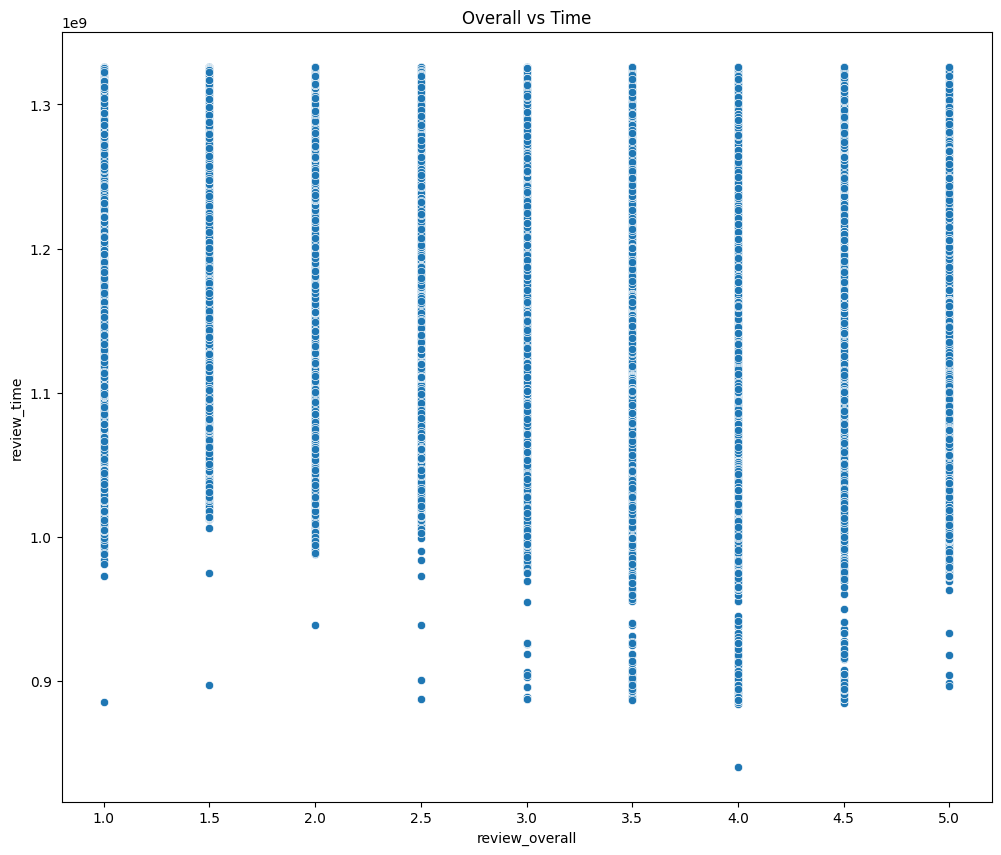

In [21]:
plt.figure(figsize=(12,10))
sns.scatterplot(x="review_overall", y="review_time", data=db)
plt.title("Overall vs Time", fontsize=12)
plt.show()

#### There is no relationship between the time taken for review and the overall quality. Hypothesis 04 is not true.

### Hypothesis 05: Atleast 80% of the beers have abv between 4% - 7%

In [22]:
summary_stats(db["beer_abv"])

{'Min': 0.01,
 '10%ile': 4.8,
 'Q1': 5.3,
 'Q2 (Median)': 6.5,
 'Q3': 8.4,
 '90%ile': 10.0,
 '95%ile': 11.0,
 '99%ile': 14.0,
 'Max': 57.7}

#### Less than 75% of the beer has abv < 7%, thus, hypothesis 5 rejected

# Feature Engineering - Adding a new rating system

#### The new rating system is dervied from all 5 ratings - aroma, appearance, taste, palate and overall. It is taken as weighted sum of each variable. 

| Previous rating | Weights |
| --------------- | ------- |
| Appearance      | 10%     |
| Palate          | 10%     |
| Aroma           | 20%     |
| Taste           | 20%     |
| Overall         | 40%     |

#### Source: https://www.ratebeer.com/our-scores

Summary of rating: 
 {'Min': 1.0, '10%ile': 3.0, 'Q1': 3.5, 'Q2 (Median)': 3.9, 'Q3': 4.2, '90%ile': 4.45, '95%ile': 4.6, '99%ile': 4.85, 'Max': 5.0}


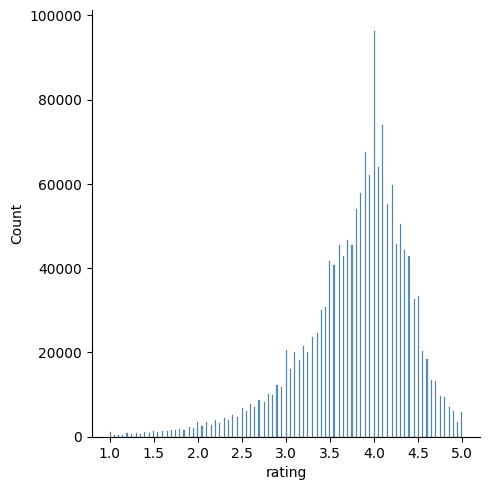

In [23]:
db['rating'] = round((0.1 * db['review_appearance']) + (0.2 * db['review_aroma']) + (0.2 * db['review_taste']) + (0.1 * db['review_palate']) + (0.4 * db['review_overall']),2)
sns.displot(db['rating'])
print("Summary of rating: \n", summary_stats(db['rating']))

In [24]:
finest = db[db['rating'] == 5]
print('\n No. of 5* Beer:',len(finest))
print('\n % of 5* Beer:',round(len(finest)/len(db)*100,2),"%")
print('\n Mean of abv for 5* Beer:',round(finest["beer_abv"].mean(),2))
print("\n Summary of ABV: \n", summary_stats(finest["beer_abv"]))
finest


 No. of 5* Beer: 5967

 % of 5* Beer: 0.38 %

 Mean of abv for 5* Beer: 8.56

 Summary of ABV: 
 {'Min': 0.5, '10%ile': 5.2, 'Q1': 6.5, 'Q2 (Median)': 8.1, 'Q3': 10.3, '90%ile': 11.5, '95%ile': 13.0, '99%ile': 18.0, 'Max': 41.0}


,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid,rating
443,1075,Caldera Brewing Company,1325980456,5.0,5.0,5.0,vicsju1991,American IPA,5.0,5.0,Caldera IPA,6.1,10784,5.0
1729,1454,Broad Ripple Brew Pub,1182392570,5.0,5.0,5.0,shbobdb,English Bitter,5.0,5.0,T.J.'s Best Bitter,5.3,16491,5.0
1768,1454,Broad Ripple Brew Pub,1288538410,5.0,5.0,5.0,908carson,American Pale Ale (APA),5.0,5.0,Wobbly Bob APA,5.5,15660,5.0
2130,577,Isle Of Skye Brewery,1000848115,5.0,5.0,5.0,dennis,Scottish Ale,5.0,5.0,Black Cuillin,4.5,1557,5.0
2399,16859,Great South Bay Brewery,1313808291,5.0,5.0,5.0,cstrong821,American Blonde Ale,5.0,5.0,Blonde Ambition,4.8,61800,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1583864,41,Brouwerij Corsendonk,1157832018,5.0,5.0,5.0,startle69,Dubbel,5.0,5.0,Corsendonk Pater / Abbey Brown Ale,7.5,138,5.0
1584917,3835,Drake's Brewing Co.,1223173299,5.0,5.0,5.0,Georgiabeer,American Double / Imperial Stout,5.0,5.0,Drake's Pinot Noir Barrel Aged Imperial Stout,8.5,45184,5.0
1585230,3835,Drake's Brewing Co.,1146496214,5.0,5.0,5.0,Vancer,American Barleywine,5.0,5.0,Drake's Barrel Aged Barley Wine,14.7,27288,5.0
1585355,3835,Drake's Brewing Co.,1235971867,5.0,5.0,5.0,ChokeHold,Scotch Ale / Wee Heavy,5.0,5.0,Drake's Brandy Barrel Aged Jolly Rodger,14.7,39017,5.0


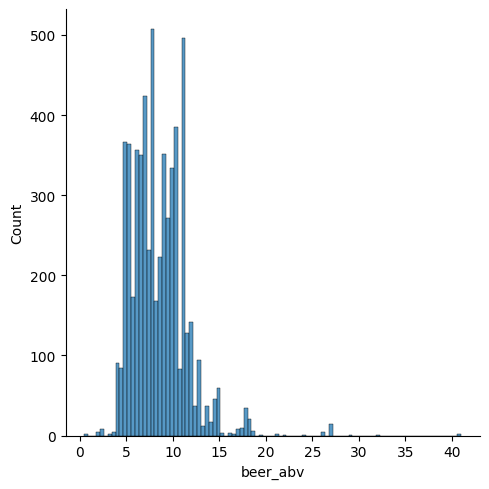

In [25]:
sns.displot(finest["beer_abv"])

## 3 Wierd Beer

In [26]:
#Beer with maximum alcohol content
a = finest[finest['beer_abv'] == 41]
print(a[["brewery_name", "beer_style", "beer_name", "beer_abv"]])

#Beer with minimum alcohol content
b = finest[finest['beer_abv'] == 0.5]
print(b[["brewery_name", "beer_style", "beer_name", "beer_abv"]])

#Beer with mean of the abv
c = finest[finest['beer_abv'] == 21]
print(c[["brewery_name", "beer_style", "beer_name", "beer_abv"]])

       brewery_name                      beer_style           beer_name  \
746345      BrewDog  American Double / Imperial IPA  Sink The Bismarck!   
746410      BrewDog  American Double / Imperial IPA  Sink The Bismarck!   

        beer_abv  
746345      41.0  
746410      41.0  
                    brewery_name        beer_style  \
832952        Erdinger Weissbräu  Low Alcohol Beer   
1061086  Cerveceria Vegana, S.A.  Low Alcohol Beer   

                              beer_name  beer_abv  
832952   Erdinger Weissbier Alkoholfrei       0.5  
1061086                     Malta India       0.5  
                              brewery_name           beer_style  \
284148  Boston Beer Company (Samuel Adams)  American Strong Ale   
284157  Boston Beer Company (Samuel Adams)  American Strong Ale   

                      beer_name  beer_abv  
284148  Samuel Adams Millennium      21.0  
284157  Samuel Adams Millennium      21.0  


## Beer I would recommend

In [27]:
style = finest["beer_style"].value_counts()
style[style == 1]

English Pale Mild Ale         1
English Stout                 1
Keller Bier / Zwickel Bier    1
Kristalweizen                 1
Name: beer_style, dtype: int64

In [28]:
style1 = finest[finest['beer_style'] == 'Kristalweizen']
print(style1[["brewery_name", "beer_style", "beer_name", "beer_abv"]])

style2 = finest[finest['beer_style'] == 'English Pale Mild Ale']
print(style2[["brewery_name", "beer_style", "beer_name", "beer_abv"]])

style3 = finest[finest['beer_style'] == 'English Stout']
print(style3[["brewery_name", "beer_style", "beer_name", "beer_abv"]])

style4 = finest[finest['beer_style'] == 'Keller Bier / Zwickel Bier']
print(style4[["brewery_name", "beer_style", "beer_name", "beer_abv"]])

                 brewery_name     beer_style               beer_name  beer_abv
1158778  Brauerei Tucher Brau  Kristalweizen  Tucher Kristall Weizen       5.1
                 brewery_name             beer_style  \
171032  Arbor Brewing Company  English Pale Mild Ale   

                               beer_name  beer_abv  
171032  Arbor Brewing Big Ben House Mild       3.5  
                         brewery_name     beer_style                beer_name  \
752064  Belhaven Brewery Company Ltd.  English Stout  Belhaven Scottish Stout   

        beer_abv  
752064       7.0  
       brewery_name                  beer_style                    beer_name  \
512039   Mahrs-Bräu  Keller Bier / Zwickel Bier  Mahr's Ungespundet-hefetrüb   

        beer_abv  
512039       5.2  


# Brewery with Best Beer & KPI 1

In [29]:
c1 = finest["brewery_name"].value_counts()
c2 = pd.DataFrame({"brewery_name": c1.index, "fin_counts": c1.values})

c3 = db["brewery_name"].value_counts()
c4 = pd.DataFrame({"brewery_name": c3.index, "db_counts": c3.values})

merged = pd.merge(c2, c4, on="brewery_name", how="left")
merged = pd.merge(merged[['brewery_name', 'fin_counts',  'db_counts']], finest[['brewery_name', 'beer_abv']], on="brewery_name", how="left")
print(merged.head(5))

summary_stats(merged["db_counts"])

                    brewery_name  fin_counts  db_counts  beer_abv
0  Russian River Brewing Company         312      11311      8.00
1  Russian River Brewing Company         312      11311     11.00
2  Russian River Brewing Company         312      11311      7.00
3  Russian River Brewing Company         312      11311     10.43
4  Russian River Brewing Company         312      11311     10.43


{'Min': 1,
 '10%ile': 741.8000000000001,
 'Q1': 2617.0,
 'Q2 (Median)': 6708.0,
 'Q3': 14534.0,
 '90%ile': 25191.0,
 '95%ile': 33066.0,
 '99%ile': 39459.0,
 'Max': 39459}

In [30]:
merged['KPI_1'] = merged["fin_counts"]/merged["db_counts"]*100 
merged = merged.sort_values(by=["fin_counts", "db_counts", "KPI_1"], ascending=False)
merged.to_excel('merged.xlsx')

#Best Brewery is Brouwerij Westvleteren (Sint-Sixtusabdij van Westvleteren) has the highest % of 5* beers (7%) 
#with considerable number of total beer reviews (171 out of 2378)

summary_stats(merged["KPI_1"])

{'Min': 0.021119324181626188,
 '10%ile': 0.23736859952526282,
 'Q1': 0.39294526181120354,
 'Q2 (Median)': 0.7246376811594203,
 'Q3': 1.186623516720604,
 '90%ile': 2.7583768013438243,
 '95%ile': 2.7583768013438243,
 '99%ile': 7.190916736753575,
 'Max': 100.0}

## KPI 2

In [31]:
s1 = finest["beer_style"].value_counts()
s2 = pd.DataFrame({"beer_style": s1.index, "fin_counts": s1.values})

s3 = db["beer_style"].value_counts()
s4 = pd.DataFrame({"beer_style": s3.index, "db_counts": s3.values})

KPI2 = pd.merge(s2, s4, on="beer_style", how="left")
KPI2 = pd.merge(KPI2[['beer_style', 'fin_counts',  'db_counts']], finest[['beer_style', 'beer_abv']], on="beer_style", how="left")
print(KPI2.head(5))

summary_stats(KPI2["db_counts"])

                       beer_style  fin_counts  db_counts  beer_abv
0  American Double / Imperial IPA         730      85977      10.0
1  American Double / Imperial IPA         730      85977       8.2
2  American Double / Imperial IPA         730      85977       8.2
3  American Double / Imperial IPA         730      85977      10.0
4  American Double / Imperial IPA         730      85977      12.0


{'Min': 297,
 '10%ile': 10950.0,
 'Q1': 18086.0,
 'Q2 (Median)': 31945.0,
 'Q3': 54129.0,
 '90%ile': 85977.0,
 '95%ile': 117586.0,
 '99%ile': 117586.0,
 'Max': 117586}

In [32]:
KPI2['KPI_2'] = KPI2["fin_counts"]/KPI2["db_counts"]*100 
KPI2 = KPI2.sort_values(by=["fin_counts", "db_counts", "KPI_2"], ascending=False)
print(KPI2)

summary_stats(KPI2["KPI_2"])

                          beer_style  fin_counts  db_counts  beer_abv  \
0     American Double / Imperial IPA         730      85977      10.0   
1     American Double / Imperial IPA         730      85977       8.2   
2     American Double / Imperial IPA         730      85977       8.2   
3     American Double / Imperial IPA         730      85977      10.0   
4     American Double / Imperial IPA         730      85977      12.0   
...                              ...         ...        ...       ...   
5956                           Kvass           2        297       2.0   
5964                   English Stout           1       3018       7.0   
5965      Keller Bier / Zwickel Bier           1       2591       5.2   
5966                   Kristalweizen           1       2204       5.1   
5963           English Pale Mild Ale           1        700       3.5   

         KPI_2  
0     0.849064  
1     0.849064  
2     0.849064  
3     0.849064  
4     0.849064  
...        ...  
5956

{'Min': 0.03313452617627568,
 '10%ile': 0.1699806301142428,
 'Q1': 0.32551410561124317,
 'Q2 (Median)': 0.4852089528877759,
 'Q3': 1.0123963125127011,
 '90%ile': 1.4002563849718963,
 '95%ile': 1.7361495079066682,
 '99%ile': 1.7361495079066682,
 'Max': 1.7361495079066682}